#### Coding the program to find is there a significant difference btw all the Payment methods and there spending 

In [ ]:
# Import the file csv to get the columns Data and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data_files/customer_arrivals_removed_outliers_.csv')

In [24]:
# import the function form the file 

import sys 
sys.path.append("..")

from Assumption_check import check_equal_variance,check_Normality

#### 1. Checking the all the methods Name

In [25]:
#Checking all the methods

df['Payment_Method'].unique()

array(['UPI', 'Card', 'Cash'], dtype=object)

#### 2. Spliting the Groups

In [26]:
# Grouping all the Payment Methods

payment_Group =[
  df[df['Payment_Method']== method]['Total Spending'].dropna()
  for method in df['Payment_Method'].unique()
]

#### 3. Checking criteria of all the Methods

In [27]:
for method in df['Payment_Method'].unique():
  check_Normality(df[df['Payment_Method']== method]['Total Spending'].dropna())

Checking the normality of the Group Group

Shapiro test result statisticcs:0.9489 , p-value:0.0128

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Group

Shapiro test result statisticcs:0.9636 , p-value:0.0253

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Group

Shapiro test result statisticcs:0.9572 , p-value:0.0450

 ❌ Not Likely normal distribution.
------------------------------------------------------------


#### 4.  Run Kruskal-Wallis

##### Working with lots of group there are big chance of there gone be one or many group that fall under the normal Distribution

In [28]:
from scipy.stats import kruskal

#Running the kruskal method
kruskal_stat, p_val = kruskal(*payment_Group)
print(f"Kruskal-Wallis Test:\nH = {kruskal_stat:.4f}, p = {p_val:.4f}\n")

#Checking the significane
if p_val> 0.05:
  print(f"Significant difference")
else:
  print(f'None significant difference')

Kruskal-Wallis Test:
H = 1.1353, p = 0.5668

Significant difference


#### Now we have a idea that there is the significant difference so we can know which group effect more which effect less 

In [29]:
#Import the function
import scikit_posthocs as sp

#Creation of subset and Running the Dunn Test
subset = df[['Payment_Method', 'Total Spending']].dropna()
dunn_result = sp.posthoc_dunn(subset, val_col='Total Spending', group_col='Payment_Method', p_adjust='holm')

print("📊 Dunn Test Results (holm-corrected p-values):")
print(dunn_result)

📊 Dunn Test Results (holm-corrected p-values):
          Card      Cash       UPI
Card  1.000000  0.965862  0.965862
Cash  0.965862  1.000000  0.873215
UPI   0.965862  0.873215  1.000000


##### Visual representation of the Dunn test

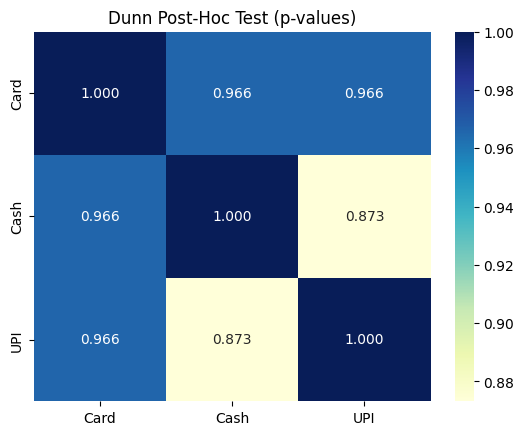

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dunn_result,fmt=".3f",cmap='YlGnBu',annot=True)
plt.title("Dunn Post-Hoc Test (p-values)")
plt.show()